# Import Libraries

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import datetime as dt


import matplotlib.ticker as mticks
import matplotlib.dates as mdates

# 1) Load Data/Create Datetime Index

In [11]:
url = 'https://docs.google.com/spreadsheets/d/e/2PACX-1vT_jChgNsQbHbg4TGepzIqk8XC9DTIKmyyxb1upo5cfZCgbfIUQc2ZC0YMzuU5uApP140Ob49KBjdqh/pub?gid=1198589591&single=true&output=csv'
df = pd.read_csv(url)
df

,date,cloud_cover,sunshine,global_radiation,max_temp,mean_temp,min_temp,precipitation,pressure,snow_depth
0,19790101,2.0,7.0,52.0,2.3,-4.1,-7.5,0.4,101900.0,9.0
1,19790102,6.0,1.7,27.0,1.6,-2.6,-7.5,0.0,102530.0,8.0
2,19790103,5.0,0.0,13.0,1.3,-2.8,-7.2,0.0,102050.0,4.0
3,19790104,8.0,0.0,13.0,-0.3,-2.6,-6.5,0.0,100840.0,2.0
4,19790105,6.0,2.0,29.0,5.6,-0.8,-1.4,0.0,102250.0,1.0
...,...,...,...,...,...,...,...,...,...,...
15336,20201227,1.0,0.9,32.0,7.5,7.5,7.6,2.0,98000.0,NaN
15337,20201228,7.0,3.7,38.0,3.6,1.1,-1.3,0.2,97370.0,NaN
15338,20201229,7.0,0.0,21.0,4.1,2.6,1.1,0.0,98830.0,NaN
15339,20201230,6.0,0.4,22.0,5.6,2.7,-0.1,0.0,100200.0,NaN


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15341 entries, 0 to 15340
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   date              15341 non-null  int64  
 1   cloud_cover       14938 non-null  float64
 2   sunshine          14957 non-null  float64
 3   global_radiation  14939 non-null  float64
 4   max_temp          14951 non-null  float64
 5   mean_temp         14922 non-null  float64
 6   min_temp          14955 non-null  float64
 7   precipitation     14951 non-null  float64
 8   pressure          14953 non-null  float64
 9   snow_depth        13589 non-null  float64
dtypes: float64(9), int64(1)
memory usage: 1.2 MB


# Convert date column to datetime dtype

In [13]:
df['datetime'] = pd.to_datetime(df['date'], format='%Y%m%d')
df.head()

,date,cloud_cover,sunshine,global_radiation,max_temp,mean_temp,min_temp,precipitation,pressure,snow_depth,datetime
0,19790101,2.0,7.0,52.0,2.3,-4.1,-7.5,0.4,101900.0,9.0,1979-01-01
1,19790102,6.0,1.7,27.0,1.6,-2.6,-7.5,0.0,102530.0,8.0,1979-01-02
2,19790103,5.0,0.0,13.0,1.3,-2.8,-7.2,0.0,102050.0,4.0,1979-01-03
3,19790104,8.0,0.0,13.0,-0.3,-2.6,-6.5,0.0,100840.0,2.0,1979-01-04
4,19790105,6.0,2.0,29.0,5.6,-0.8,-1.4,0.0,102250.0,1.0,1979-01-05


# Set 'date' column as the index

In [14]:
df = df.set_index('datetime')
df.head(2)

,date,cloud_cover,sunshine,global_radiation,max_temp,mean_temp,min_temp,precipitation,pressure,snow_depth
datetime,,,,,,,,,,
1979-01-01,19790101,2.0,7.0,52.0,2.3,-4.1,-7.5,0.4,101900.0,9.0
1979-01-02,19790102,6.0,1.7,27.0,1.6,-2.6,-7.5,0.0,102530.0,8.0


In [15]:
# drop date from dataset
df.drop(columns='date', inplace=True)
df.head()

,cloud_cover,sunshine,global_radiation,max_temp,mean_temp,min_temp,precipitation,pressure,snow_depth
datetime,,,,,,,,,
1979-01-01,2.0,7.0,52.0,2.3,-4.1,-7.5,0.4,101900.0,9.0
1979-01-02,6.0,1.7,27.0,1.6,-2.6,-7.5,0.0,102530.0,8.0
1979-01-03,5.0,0.0,13.0,1.3,-2.8,-7.2,0.0,102050.0,4.0
1979-01-04,8.0,0.0,13.0,-0.3,-2.6,-6.5,0.0,100840.0,2.0
1979-01-05,6.0,2.0,29.0,5.6,-0.8,-1.4,0.0,102250.0,1.0


# Filter only the required data:

- Keep only data from the year 2000 or later.
- Keep only the following features:
  - precipitation
  - mean_temp
  - min_temp
  - max_temp
  - snow_depth

### Filter Years

In [16]:
df.index.strftime('%Y').unique()

Index(['1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987',
       '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996',
       '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005',
       '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014',
       '2015', '2016', '2017', '2018', '2019', '2020'],
      dtype='object', name='datetime')

In [17]:
df = df.loc['2000':]
df.head()

,cloud_cover,sunshine,global_radiation,max_temp,mean_temp,min_temp,precipitation,pressure,snow_depth
datetime,,,,,,,,,
2000-01-01,7.0,0.4,18.0,10.8,7.0,4.9,0.0,102450.0,0.0
2000-01-02,7.0,0.7,20.0,11.5,7.9,5.0,0.2,102530.0,0.0
2000-01-03,8.0,0.0,13.0,9.5,9.4,7.2,6.0,101860.0,0.0
2000-01-04,5.0,2.9,34.0,11.0,7.0,4.4,0.2,101480.0,0.0
2000-01-05,5.0,1.3,25.0,10.8,6.4,1.9,0.8,101420.0,0.0


In [18]:
df.index.strftime('%Y').unique()

Index(['2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008',
       '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017',
       '2018', '2019', '2020'],
      dtype='object', name='datetime')

## Filter Features

In [19]:
df = df[['precipitation', 'mean_temp', 'min_temp', 'max_temp', 'snow_depth']]
df.head()

,precipitation,mean_temp,min_temp,max_temp,snow_depth
datetime,,,,,
2000-01-01,0.0,7.0,4.9,10.8,0.0
2000-01-02,0.2,7.9,5.0,11.5,0.0
2000-01-03,6.0,9.4,7.2,9.5,0.0
2000-01-04,0.2,7.0,4.4,11.0,0.0
2000-01-05,0.8,6.4,1.9,10.8,0.0


# Resample & Impute missing values

- Think about each feature and what imputation method makes sense. 

- You may not be able to use the same method for every feature!

In [20]:
df.isna().sum()

precipitation     390
mean_temp         419
min_temp          386
max_temp          390
snow_depth       1752
dtype: int64

In [21]:
((df.isna().sum() / len(df)) * 100).round(2)

precipitation     5.08
mean_temp         5.46
min_temp          5.03
max_temp          5.08
snow_depth       22.84
dtype: float64

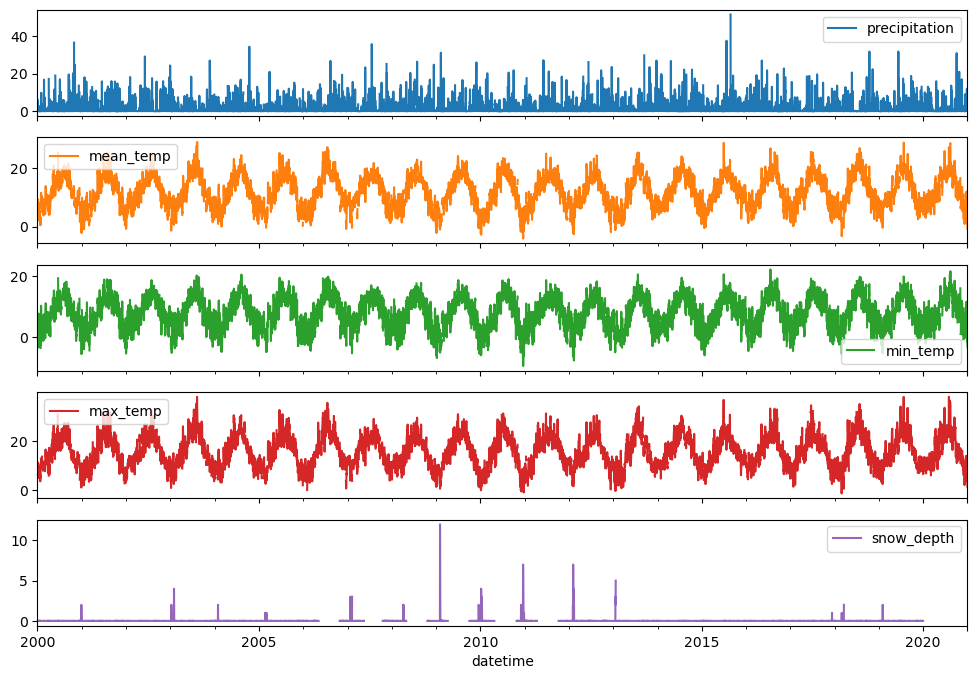

In [22]:
df.plot(figsize=(12,8), subplots=True);

### Resample

In [23]:
agg_dict = {'precipitation': 'sum', 'mean_temp': 'mean'}

df_month = df.copy()
df_month = df.resample('M').agg(agg_dict['precipitation'])
df_month

,precipitation,mean_temp,min_temp,max_temp,snow_depth
datetime,,,,,
2000-01-31,14.3,159.5,78.3,236.6,0.0
2000-02-29,62.2,200.9,110.0,288.0,0.0
2000-03-31,13.4,254.6,147.0,366.2,0.0
2000-04-30,71.8,256.1,149.9,373.5,0.0
2000-05-31,68.4,402.4,278.9,520.2,0.0
...,...,...,...,...,...
2020-08-31,45.2,578.1,463.8,712.6,0.0
2020-09-30,19.2,479.6,334.8,625.6,0.0
2020-10-31,143.4,331.5,257.9,418.3,0.0


In [24]:
df_year = df.copy()
df_year = df.resample('A').agg(agg_dict['mean_temp'])
df_year

,precipitation,mean_temp,min_temp,max_temp,snow_depth
datetime,,,,,
2000-12-31,2.107289,11.532070,7.973469,15.108746,0.008746
2001-12-31,1.952023,11.313006,7.641618,14.965029,0.000000
2002-12-31,2.148286,12.006286,8.353143,15.732000,0.000000
2003-12-31,1.311396,12.232764,7.986040,16.494302,0.025641
2004-12-31,1.710951,11.872046,8.212392,15.514409,0.005764
2005-12-31,1.218497,11.879883,8.026301,15.732659,0.008721
2006-12-31,1.737931,12.387941,8.518103,16.173276,0.000000
2007-12-31,1.881449,12.063717,8.218551,15.942609,0.032609
2008-12-31,1.755932,11.174855,7.451412,15.025141,0.021858


### Impute Missing Values

In [25]:
df_month.isna().sum()

precipitation    0
mean_temp        0
min_temp         0
max_temp         0
snow_depth       0
dtype: int64

In [26]:
df_year.isna().sum()

precipitation    0
mean_temp        0
min_temp         0
max_temp         0
snow_depth       1
dtype: int64

In [27]:
df_year = df_year.interpolate()
df_year.isna().sum()

precipitation    0
mean_temp        0
min_temp         0
max_temp         0
snow_depth       0
dtype: int64

# 2) Answer the Questions with Visualizations (Using the Correct Frequency)

## Q1: What month had the most precipitation between 2000 through 2010?
- Resample the data as Monthly frequency.
- Find the date and corresponding value for the max precipitation.
- Plot the feature and time period that corresponds to the question.
- Make sure to meet the "Visualization Requirements" below!
- Determine the date and value for the most precipitation (the max precipitation).
- Add a vertical line at this date with a label that says the date (using date format: "April 2000") and the max precipitation value.
- Make sure to add a legend so that your label is visible.

In [28]:
df_month = df_month.loc['2000':'2010']
df_month.index

DatetimeIndex(['2000-01-31', '2000-02-29', '2000-03-31', '2000-04-30',
               '2000-05-31', '2000-06-30', '2000-07-31', '2000-08-31',
               '2000-09-30', '2000-10-31',
               ...
               '2010-03-31', '2010-04-30', '2010-05-31', '2010-06-30',
               '2010-07-31', '2010-08-31', '2010-09-30', '2010-10-31',
               '2010-11-30', '2010-12-31'],
              dtype='datetime64[ns]', name='datetime', length=132, freq='M')

In [29]:
df_month.head()

,precipitation,mean_temp,min_temp,max_temp,snow_depth
datetime,,,,,
2000-01-31,14.3,159.5,78.3,236.6,0.0
2000-02-29,62.2,200.9,110.0,288.0,0.0
2000-03-31,13.4,254.6,147.0,366.2,0.0
2000-04-30,71.8,256.1,149.9,373.5,0.0
2000-05-31,68.4,402.4,278.9,520.2,0.0


## Date/Value for Max Precipitation

In [30]:
df_month.loc[df_month['precipitation'].idxmax()]

precipitation    138.4
mean_temp        288.1
min_temp         214.1
max_temp         356.1
snow_depth         0.0
Name: 2009-11-30 00:00:00, dtype: float64

In [31]:
precipitation, mean_temp, min_temp, max_temp, snow_depth = df_month.loc[df_month['precipitation'].idxmax()]

In [32]:
date = df_month.loc[df_month['precipitation'].idxmax()].name.date()
print(date)

2009-11-30


In [33]:
print(f'Date with highest precipitation: {date}')
print(f'Precipitation: {precipitation}')

Date with highest precipitation: 2009-11-30
Precipitation: 138.4


## Plot feature and time period

In [34]:
ts_2010 = df_month['precipitation']
ts_2010

datetime
2000-01-31    14.3
2000-02-29    62.2
2000-03-31    13.4
2000-04-30    71.8
2000-05-31    68.4
              ... 
2010-08-31    83.8
2010-09-30    38.0
2010-10-31    61.0
2010-11-30    22.0
2010-12-31    21.2
Freq: M, Name: precipitation, Length: 132, dtype: float64

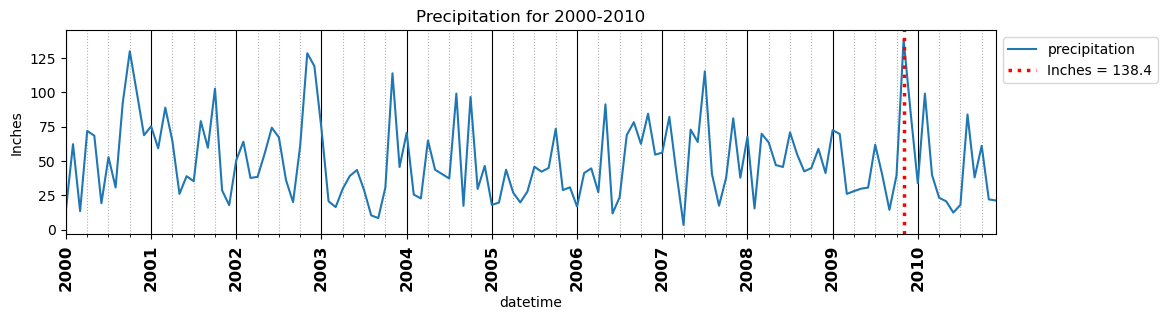

In [35]:
# move legend to outside of plot on right side
fig, ax = plt.subplots(figsize=(12,3))
ax.set_title('Precipitation for 2000-2010')

ts_2010.plot(style='-')


## Change the font of the major ticks to stand out
ax.set_xticks(ax.get_xticks())
ax.set_xticklabels(ax.get_xticklabels(), 
                   fontsize='large', 
                   fontweight='bold') 


## Making major/minor gridlines visually distinct
ax.grid(which='minor',axis='x',ls=":")
ax.grid(which='major',axis='x',color='k')

## rotate the dates
fig.autofmt_xdate(which='major',rotation=90,ha='center')

ax.axvline(date ,color='red',lw=2.5, ls=':', label=f'Inches = {precipitation}')

plt.ylabel('Inches')

ax.legend(bbox_to_anchor=[1,1]);

# Q2: Which year between 2000-2020 had the coolest average temperature?

- Resample the data as Yearly frequency.
- Plot the feature and time period that corresponds to the question.
  - Make sure to meet the "Visualization Requirements" below!
- Determine the date and value for the lowest mean temp.
- Add a vertical line at this date with a label that says the date (using date format: "2000") and the lowest mean temperature value.

In [36]:
df_year.index

DatetimeIndex(['2000-12-31', '2001-12-31', '2002-12-31', '2003-12-31',
               '2004-12-31', '2005-12-31', '2006-12-31', '2007-12-31',
               '2008-12-31', '2009-12-31', '2010-12-31', '2011-12-31',
               '2012-12-31', '2013-12-31', '2014-12-31', '2015-12-31',
               '2016-12-31', '2017-12-31', '2018-12-31', '2019-12-31',
               '2020-12-31'],
              dtype='datetime64[ns]', name='datetime', freq='A-DEC')

In [37]:
df_year.head()

,precipitation,mean_temp,min_temp,max_temp,snow_depth
datetime,,,,,
2000-12-31,2.107289,11.532070,7.973469,15.108746,0.008746
2001-12-31,1.952023,11.313006,7.641618,14.965029,0.000000
2002-12-31,2.148286,12.006286,8.353143,15.732000,0.000000
2003-12-31,1.311396,12.232764,7.986040,16.494302,0.025641
2004-12-31,1.710951,11.872046,8.212392,15.514409,0.005764


In [38]:
df_year.loc[df_year['mean_temp'].idxmin()]

precipitation     1.378426
mean_temp        10.645773
min_temp          6.764723
max_temp         14.491545
snow_depth        0.294118
Name: 2010-12-31 00:00:00, dtype: float64

In [39]:
precipitation2, mean_temp2, min_temp2, max_temp2, snow_depth2 = df_year.loc[df_year['mean_temp'].idxmin()].round(2)

In [40]:
date2 = df_year.loc[df_year['mean_temp'].idxmin()].name.date()
print(date2)

2010-12-31


In [41]:
print(f'Date with the highest precipitation: {date2}')
print(f'Precipitation: {mean_temp2}')

Date with the highest precipitation: 2010-12-31
Precipitation: 10.65


## Plot the feature and time period

In [42]:
ts_2020 = df_year['mean_temp'].round(2)
ts_2020

datetime
2000-12-31    11.53
2001-12-31    11.31
2002-12-31    12.01
2003-12-31    12.23
2004-12-31    11.87
2005-12-31    11.88
2006-12-31    12.39
2007-12-31    12.06
2008-12-31    11.17
2009-12-31    11.72
2010-12-31    10.65
2011-12-31    12.47
2012-12-31    11.32
2013-12-31    11.20
2014-12-31    12.61
2015-12-31    12.09
2016-12-31    11.89
2017-12-31    12.24
2018-12-31    12.44
2019-12-31    12.23
2020-12-31    12.72
Freq: A-DEC, Name: mean_temp, dtype: float64

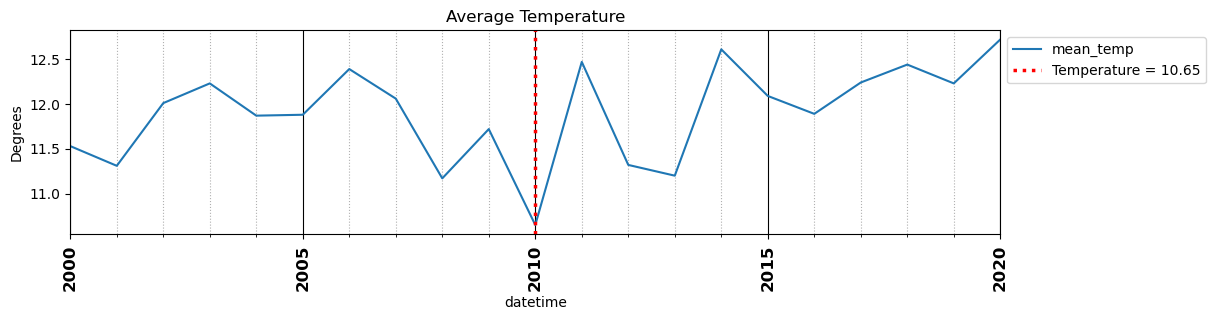

In [43]:
# move legend to outside of plot on right side
fig, ax = plt.subplots(figsize=(12,3))
ax.set_title('Average Temperature')

ts_2020.plot(style='-')


## Change the font of the major ticks to stand out
ax.set_xticks(ax.get_xticks())
ax.set_xticklabels(ax.get_xticklabels(), 
                   fontsize='large', 
                   fontweight='bold') 


## Making major/minor gridlines visually distinct
ax.grid(which='minor',axis='x',ls=":")
ax.grid(which='major',axis='x',color='k')

## rotate the dates
fig.autofmt_xdate(which='major',rotation=90,ha='center')

ax.axvline(date2, color='red',lw=2.5, ls=':', label=f'Temperature = {mean_temp2}')

plt.ylabel('Degrees')

ax.legend(bbox_to_anchor=[1,1]);